In [1]:
pip install pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Sample Data:
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               320  0.006220  0.004661  0.015629  0.001047   
1               310  0.006420  0.004635  0.015629  0.001047   
2               251  0.007930  0.006836  0.023687  0.001151   
3               497  0.004020  0.003992  0.015406  0.000108   
4               581  0.003439  0.003229  0.012773  0.000108   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  16                   20             0  
1                  16                   20             0  
2                  13                   20             0  
3                  33                   20             0  
4                  30                   20             0  

Basic Stats:
       received packets   IAT_Mean    IAT_Std    IAT_Max    IAT_Min  \
count         18.000000  18.000000  18.000000  18.000000  18.000000   
mean         336.611111   0.136203   0.021842   0.198791   0.124199   
std          340.517450   0

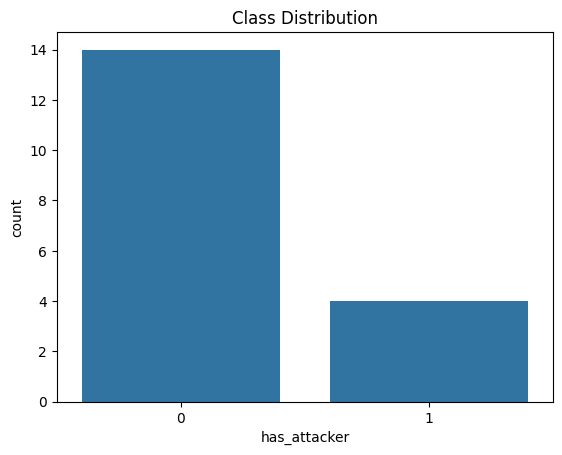


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6


Confusion Matrix:
[[4 1]
 [0 1]]


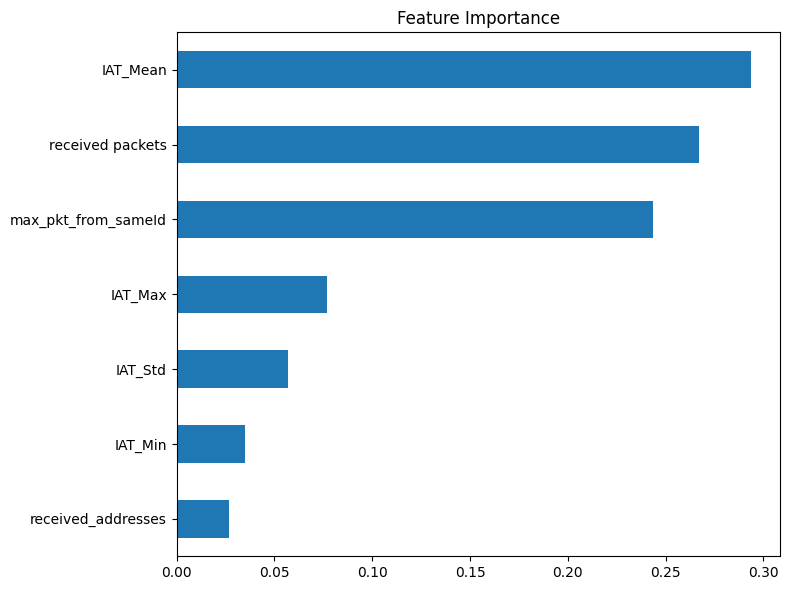

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: Load the dataset ===
file_path = 'Dataset_timewin_28.json'  

# Read JSON lines
with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

# Convert to DataFrame
df = pd.DataFrame(data)

print("Sample Data:")
print(df.head())

# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
